Práctica Luis Bastos

In [ ]:
import numpy as np
import pandas as pd

# nos descargamos el dataset de OpenDataSoft
!wget -O "airbnb-listings.csv" "https://public.opendatasoft.com/explore/dataset/airbnb-listings/download/?format=csv&disjunctive.host_verifications=true&disjunctive.amenities=true&disjunctive.features=true&refine.country=Spain&q=Madrid&timezone=Europe/London&use_labels_for_header=true&csv_separator=%3B"

--2020-07-19 18:41:34--  https://public.opendatasoft.com/explore/dataset/airbnb-listings/download/?format=csv&disjunctive.host_verifications=true&disjunctive.amenities=true&disjunctive.features=true&refine.country=Spain&q=Madrid&timezone=Europe/London&use_labels_for_header=true&csv_separator=%3B
Resolving public.opendatasoft.com (public.opendatasoft.com)... 34.249.199.226, 34.248.20.69
Connecting to public.opendatasoft.com (public.opendatasoft.com)|34.249.199.226|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/csv]
Saving to: ‘airbnb-listings.csv’

airbnb-listings.csv     [          <=>       ]  54.19M  2.84MB/s    in 34s     

2020-07-19 18:42:12 (1.59 MB/s) - ‘airbnb-listings.csv’ saved [56826824]



In [ ]:
!ls -lah

total 55M
drwxr-xr-x 1 root root 4.0K Jul 19 18:41 .
drwxr-xr-x 1 root root 4.0K Jul 19 18:36 ..
-rw-r--r-- 1 root root  55M Jul 19 18:42 airbnb-listings.csv
drwxr-xr-x 1 root root 4.0K Jul 15 16:11 .config
drwx------ 4 root root 4.0K Jul 19 18:41 drive
drwxr-xr-x 1 root root 4.0K Jul 10 16:29 sample_data


In [ ]:
# Leemos el dataset con pandas y mostramos los 5 primeros registros
data = pd.read_csv('airbnb-listings.csv', sep = ';')
data.head(5)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (40) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,Notes,Transit,Access,Interaction,House Rules,Thumbnail Url,Medium Url,Picture Url,XL Picture Url,Host ID,Host URL,Host Name,Host Since,Host Location,Host About,Host Response Time,Host Response Rate,Host Acceptance Rate,Host Thumbnail Url,Host Picture Url,Host Neighbourhood,Host Listings Count,Host Total Listings Count,Host Verifications,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,...,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Has Availability,Availability 30,Availability 60,Availability 90,Availability 365,Calendar last Scraped,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,12768616,https://www.airbnb.com/rooms/12768616,20170407214050,2017-04-08,Ramblas Studio D,"Unique apartment in vibrant neighborhoods, car...",Centrally located in the atmospheric Gothic Qu...,"Unique apartment in vibrant neighborhoods, car...",none,Located on the edge of the Gothic Quarter of B...,NaN,The nearest station is Place de Catalunya a fe...,NaN,NaN,No pets or smoking allowed.,https://a0.muscache.com/im/pictures/cffe393a-0...,https://a0.muscache.com/im/pictures/cffe393a-0...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/cffe393a-0...,54310958,https://www.airbnb.com/users/show/54310958,Javier,2016-01-12,"Madrid, Community of Madrid, Spain",Be Mate offers the exclusive City Mate service...,within an hour,99.0,NaN,https://a0.muscache.com/im/pictures/8f3ec0f2-1...,https://a0.muscache.com/im/pictures/8f3ec0f2-1...,L'Antiga Esquerra de l'Eixample,207.0,207.0,"email,phone,reviews,jumio","El Gòtic, Barcelona, Catalunya 08002, Spain",El Gòtic,el Barri Gòtic,Ciutat Vella,Barcelona,Catalunya,...,2,1.0,0.0,1.0,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,...",NaN,349.0,NaN,NaN,NaN,NaN,1,0,2,1125,a week ago,NaN,2,2,2,2,2017-04-08,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,strict,92,NaN,"41.3838872822,2.17180232785","Host Has Profile Pic,Host Identity Verified,Is..."
1,1629146,https://www.airbnb.com/rooms/1629146,20170407214050,2017-04-08,"Design, art & vintage / old city","If you're looking for a cool, spacious, light,...",The apartment is very comfortable and very tas...,"If you're looking for a cool, spacious, light,...",none,• A major advantage of this apartment is its l...,• Possibility of offering Premium Services suc...,• Nearest metro station is 1 min walk (Sant A...,Here's a list of of things we provide to our g...,==============================================...,* NO parties are allowed * NO noise on the st...,https://a0.muscache.com/im/pictures/ea919e56-a...,https://a0.muscache.com/im/pictures/ea919e56-a...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/ea919e56-a...,8658841,https://www.airbnb.com/users/show/8658841,Olga & Co.,2013-09-05,"Barcelona, Catalonia, Spain","World traveller, currently living and working ...",within an hour,100.0,NaN,https://a0.muscache.com/im/pictures/d67fdad1-e...,https://a0.muscache.com/im/pictures/d67fdad1-e...,El Raval,2.0,2.0,"email,phone,reviews,jumio","El Raval, Barcelona, Catalonia 08001, Spain",El Raval,el Raval,Ciutat Vella,Barcelona,Catalonia,...,6,1.0,2.0,3.0,Real Bed,"TV,Internet,Wireless Internet,Air conditioning...",NaN,165.0,NaN,NaN,150.0,60.0,4,20,3,30,2 days ago,NaN,5,10,22,80,2017-04-08,110,2013-10-19,2017-03-25,93.0,9.0,9.0,10.0,10.0,9.0,9.0,NaN,NaN,strict,1,2.60,"41.3826627171,2.16755841626","Host Has Profile Pic,Host Identity Ve

In [ ]:
# vamos a ver de cuantos registros disponemos y de cuantas variables
data.shape

(14001, 89)

In [ ]:
# ¿De qué variables disponemos?
data.columns

Index(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',
       'Month

In [ ]:
images_paths = [[i, img_url] for i, img_url in enumerate(data['Thumbnail Url'])]

In [ ]:
images_paths[:5]

[[0,
  'https://a0.muscache.com/im/pictures/cffe393a-0d84-4fd5-ab4c-a62e067c1b0d.jpg?aki_policy=small'],
 [1,
  'https://a0.muscache.com/im/pictures/ea919e56-aa99-4d5d-a129-1edf0d117d6a.jpg?aki_policy=small'],
 [2,
  'https://a0.muscache.com/im/pictures/57011236/eea5c213_original.jpg?aki_policy=small'],
 [3,
  'https://a0.muscache.com/im/pictures/974f0245-55c2-4e8c-b9bf-14c1c975c798.jpg?aki_policy=small'],
 [4,
  'https://a0.muscache.com/im/pictures/c2dde263-20dd-43af-8c6b-be636c2c0ce1.jpg?aki_policy=small']]

In [ ]:
import imageio as io
import cv2

# esta es la función que se descargará la imagen y devolverá la imagen y el 
# índice indicando la posición donde se incrustará la imagen en nuestro array
def get_image(data_url, target_size=(224, 224)):
    idx, url = data_url
    try:
        img = io.imread(url)
        # hay alguna imagen en blanco y negro y daría error al incluirla en 
        # nuestro array de imagenes que tiene 3 canales, así que convertimos
        # todas las imágenes que tengan menos de 3 dimensiones a color
        if img.ndim < 3:
            img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        img = cv2.resize(img, dsize=target_size)
        return img, idx
    except IOError as err:
        return (None, idx)

In [ ]:
import numpy as np

# en este array iremos incrustando las imágenes conforme las vayamos obteniendo
loaded_images = np.zeros((len(images_paths), 224, 224, 3), dtype=np.uint8)

# y en este array llevaremos un control de cuales se han cargado correctamente
# y cuales no
was_loaded = np.zeros(len(images_paths))

In [ ]:
print(loaded_images.shape)

(14001, 224, 224, 3)


In [ ]:
import concurrent
from tqdm import tqdm

# creamos un pool de procesos que se irán descargando las imágenes
# por defecto, se crearán tantos como CPUs tenga vuestra máquina
with concurrent.futures.ProcessPoolExecutor() as executor:
    # procesamos la lista de urls de imágenes paralelizandola con el pool de procesos
    for (img, idx) in tqdm(executor.map(get_image, images_paths), total=len(images_paths)):
        # metemos la imagen en nuestro array
        if img is not None:
            loaded_images[idx] = img
            was_loaded[idx] = 1
        else:
            was_loaded[idx] = 0

print('Terminado!')
print(f'Total de imágenes recuperadas correctamente: {sum(was_loaded)}/{len(images_paths)}')

100%|██████████| 14001/14001 [15:19<00:00, 15.23it/s]


Terminado!
Total de imágenes recuperadas correctamente: 11270.0/14001


In [ ]:
# guardamos las imágenes (y yo os recomiendo que os lo guardéis en GDrive para evitar tener que repetir esto)
np.save('images.npy', loaded_images)
np.save('was_loaded.npy', was_loaded)

In [ ]:
# montamos GDrive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# almacenamos las imagenes en nuestro drive
!cp images.npy /content/drive/My\ Drive/images.npy
!cp was_loaded.npy /content/drive/My\ Drive/was_loaded.npy

^C


In [ ]:
!ls -lah images.npy was_loaded.npy

-rw-r--r-- 1 root root 2.0G Jul 19 18:57 images.npy
-rw-r--r-- 1 root root 110K Jul 19 18:57 was_loaded.npy


In [ ]:
# nos quedamos con los datos para los que hemos podido encontrar imágenes
data_with_imgs = data[was_loaded == 1]

In [ ]:
len(data_with_imgs)

11270

In [ ]:
final_data = data.iloc[was_loaded, :]
final_data.shape

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data_with_imgs, test_size=0.2, shuffle=True, random_state=0)

print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

# Guardamos
#train.to_csv('./train.csv', sep=';', decimal='.', index=False)
#test.to_csv('./test.csv', sep=';', decimal='.', index=False)

# A partir de este momento cargamos el dataset de train y trabajamos ÚNICAMENTE con él. 

#df = pd.read_csv('./train.csv', sep=';', decimal='.')

Dimensiones del dataset de training: (9016, 89)
Dimensiones del dataset de test: (2254, 89)


In [ ]:
train.head()

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,Notes,Transit,Access,Interaction,House Rules,Thumbnail Url,Medium Url,Picture Url,XL Picture Url,Host ID,Host URL,Host Name,Host Since,Host Location,Host About,Host Response Time,Host Response Rate,Host Acceptance Rate,Host Thumbnail Url,Host Picture Url,Host Neighbourhood,Host Listings Count,Host Total Listings Count,Host Verifications,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,...,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Has Availability,Availability 30,Availability 60,Availability 90,Availability 365,Calendar last Scraped,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
6360,17903615,https://www.airbnb.com/rooms/17903615,20170407214119,2017-04-08,Private room La Latina,Habitación privada enorme en La Latina con bal...,NaN,Habitación privada enorme en La Latina con bal...,none,NaN,NaN,NaN,NaN,NaN,- Smoking only in the balcony,https://a0.muscache.com/im/pictures/b925f6c4-8...,https://a0.muscache.com/im/pictures/b925f6c4-8...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/b925f6c4-8...,122684529,https://www.airbnb.com/users/show/122684529,Lucia,2017-03-26,"Madrid, Community of Madrid, Spain","Soy Lucía, nacidad en el bello Santander y res...",within a day,78.0,NaN,https://a0.muscache.com/im/pictures/1712c886-c...,https://a0.muscache.com/im/pictures/1712c886-c...,La Latina,1.0,1.0,"email,phone","La Latina, Madrid, Comunidad de Madrid 28005, ...",La Latina,Palacio,Centro,Madrid,Comunidad de Madrid,...,2,1.0,1.0,1.0,Real Bed,"Wireless Internet,Kitchen,Smoking allowed,Brea...",NaN,55.0,NaN,NaN,NaN,NaN,1,0,1,1125,5 days ago,NaN,27,57,87,88,2017-04-07,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,flexible,1,NaN,"40.4116070068,-3.70905827724","Host Has Profile Pic,Is Location Exact,Require..."
12195,1753278,https://www.airbnb.com/rooms/1753278,20170407214119,2017-04-08,Habitación doble en suite,Ofrecemos alojamiento para dos personas en nue...,NaN,Ofrecemos alojamiento para dos personas en nue...,none,NaN,NaN,NaN,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/24820520/b...,https://a0.muscache.com/im/pictures/24820520/b...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/24820520/b...,9222331,https://www.airbnb.com/users/show/9222331,Gabriela,2013-10-04,"Madrid, Community of Madrid, Spain",NaN,NaN,NaN,NaN,https://a0.muscache.com/im/users/9222331/profi...,https://a0.muscache.com/im/users/9222331/profi...,Rios Rosas,1.0,1.0,"email,phone,reviews,jumio","Rios Rosas, Madrid, Community of Madrid 28003,...",Rios Rosas,Rios Rosas,Chamberí,Madrid,Community of Madrid,...,2,1.0,1.0,2.0,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Wheelch...",NaN,55.0,NaN,NaN,NaN,NaN,1,20,3,1125,2 months ago,NaN,29,59,89,364,2017-04-08,2,2015-03-04,2015-04-06,80.0,9.0,9.0,10.0,10.0,10.0,9.0,NaN,NaN,flexible,1,0.08,"40.4419817845,-3.69965177426","Host Has Profile Pic,Host Identity Verified,Is..."
1546,14662043,https://www.airbnb.com/rooms/14662043,20170407214119,2017-04-08,Hab Doble Grande y Luminosa en el CENTRO de MA...,"Ubicación inmejorable, con servicios de buses,...",NaN,"Ubicación inmejorable, con servicios de buses,...",none,NaN,NaN,NaN,NaN,NaN,- Disponible las 24 Horas - Conexión WIFI (GRA...,https://a0.muscache.com/im/pictures/47c36c03-1...,https://a0.muscache.com/im/pictures/47c36c03-1...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/47c36c03-1...,72430

In [ ]:
train.dtypes

ID                                  int64
Listing Url                        object
Scrape ID                           int64
Last Scraped                       object
Name                               object
                                   ...   
Cancellation Policy                object
Calculated host listings count      int64
Reviews per Month                 float64
Geolocation                        object
Features                           object
Length: 89, dtype: object

In [ ]:
train.isnull().any()

ID                                False
Listing Url                       False
Scrape ID                         False
Last Scraped                      False
Name                              False
                                  ...  
Cancellation Policy               False
Calculated host listings count    False
Reviews per Month                  True
Geolocation                       False
Features                          False
Length: 89, dtype: bool

Como se puede comprobar en la siguiente inea, el dataset contiene numerosas ciudades. Aunque se deberia realizar un análisis para determinar que ciudad escogeriamos, nosotros de antemano sabemos que nuestro análisis se centrara en Madrid.

In [ ]:
train['City'].unique()

array(['Madrid', 'Barcelona', 'Ses Salines', 'Valldemossa', 'Costitx',
       '马德里', 'Motilla del Palancar', 'Madrid, Comunidad de Madrid, ES',
       'Santanyí', 'Chueca, Madrid', 'Palma', 'Sóller', 'Sant Joan',
       'Urbanització Montferrutx', 'Aravaca (Madrid)', nan, 'Algaida',
       'Comunidad de Madrid', 'Málaga', 'La Puebla', 'Felanitx',
       'Son Servera', 'Illetes', 'Cala Pi', 'Inca', 'Puerto ALCUDIA',
       'Deià', 'Alaró', 'Illes Balears', 'Pozuelo de Alarcón',
       'Torrenova', 'Palma de Mallorca', 'Sineu', 'Can Pastilla',
       'Pollença', 'San Fernando de Henares', 'Port de Sóller',
       'las matas  madrid', 'Delicias', 'Cala Agulla', 'Peguera, Calvià',
       'Calvià', 'Cala Ratjada', 'Alcúdia',
       'Puerto Pollensa (Palma de Mallorca)', 'madrid', '馬德里',
       'Llucmajor', 'Vallgornera', 'Centro, Madrid', 'Búger',
       'Valderrodrigo', 'Madrid, Vallecas (Fontarrón)', 'Chueca',
       'Magaluf', 'Son Moll', 'Can Picafort', 'Colònia de Sant Jordi',
       '

Como hay datos de Madrid con distintos nobres, realizamos una busqueda con contains y obtenemos el total de datos.

In [ ]:
train = train[train['City'].str.contains('drid', na=False)]

In [ ]:
train['City'].unique()
train.shape

(8595, 89)

In [ ]:
train['City']=='Madrid'

6360     True
12195    True
1546     True
9327     True
5697     True
         ... 
6043     True
4093     True
12239    True
13440    True
3417     True
Name: City, Length: 8595, dtype: bool

In [ ]:
train['City'] = train['City'].apply(lambda x: 'Madrid')
train['City'].unique()

array(['Madrid'], dtype=object)

In [ ]:
train.shape

(8595, 89)

Cambiamos la variable objetivo al primero lugar

In [ ]:
from pandas import DataFrame
def move_columns(df: pd.DataFrame, cols_to_move: list, new_index: int) -> DataFrame:
    other = [c for c in df if c not in cols_to_move]
    start = other[0:new_index]
    end = other[new_index:]
    return df[start + cols_to_move + end]
train = move_columns(train, ['Price'],0)

In [ ]:
train.columns

Index(['Price', 'ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name',
       'Summary', 'Space', 'Description', 'Experiences Offered',
       'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction',
       'House Rules', 'Thumbnail Url', 'Medium Url', 'Picture Url',
       'XL Picture Url', 'Host ID', 'Host URL', 'Host Name', 'Host Since',
       'Host Location', 'Host About', 'Host Response Time',
       'Host Response Rate', 'Host Acceptance Rate', 'Host Thumbnail Url',
       'Host Picture Url', 'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Weekly Price',
       'Month

#Comenzamos con el análisis exploratorio de los datos para el modelo numércio y de variables categóricas 
 En primero lugar eliminamos las variables que correspondan a IDs y URLs.

In [ ]:
train = train.drop(['ID','Listing Url','Scrape ID','Thumbnail Url','Medium Url','Picture Url','XL Picture Url', 'Host ID', 'Host URL', 'Host Name','Host About', 'Host Thumbnail Url', 'Host Picture Url', 'License', 'Jurisdiction Names','Features' ],axis=1)


In [ ]:
#Vemos que hemos eliminado de las columnas
train.shape

(8595, 73)

Ahora, calculamos el número de missing que hay en cada variable y eliminamos aquellas que tienen más de un 30% de valores missing.

In [ ]:
train_missing = train.isna()
train_num_missing = train_missing.sum()
total_per = train_num_missing / len(train)

In [ ]:
for items in total_per.iteritems():
    print(items)

('Price', 0.00011634671320535195)
('Last Scraped', 0.0)
('Name', 0.0)
('Summary', 0.03222803955788249)
('Space', 0.2665503199534613)
('Description', 0.0006980802792321117)
('Experiences Offered', 0.0)
('Neighborhood Overview', 0.3607911576497964)
('Notes', 0.6074461896451425)
('Transit', 0.35846422338568934)
('Access', 0.4107038976148924)
('Interaction', 0.4181500872600349)
('House Rules', 0.34566608493310064)
('Host Since', 0.0002326934264107039)
('Host Location', 0.0032577079697498545)
('Host Response Time', 0.11820826061663758)
('Host Response Rate', 0.11820826061663758)
('Host Acceptance Rate', 1.0)
('Host Neighbourhood', 0.2545666084933101)
('Host Listings Count', 0.0002326934264107039)
('Host Total Listings Count', 0.0002326934264107039)
('Host Verifications', 0.0)
('Street', 0.0)
('Neighbourhood', 0.3483420593368237)
('Neighbourhood Cleansed', 0.0)
('Neighbourhood Group Cleansed', 0.0)
('City', 0.0)
('State', 0.0030250145433391505)
('Zipcode', 0.0356020942408377)
('Market', 0.00

In [ ]:
listado = []
for index, value in total_per.items():
    if value > 0.3:
        listado += [index]
        print(f"Index : {index}, Value : {value}")



Index : Neighborhood Overview, Value : 0.3607911576497964
Index : Notes, Value : 0.6074461896451425
Index : Transit, Value : 0.35846422338568934
Index : Access, Value : 0.4107038976148924
Index : Interaction, Value : 0.4181500872600349
Index : House Rules, Value : 0.34566608493310064
Index : Host Acceptance Rate, Value : 1.0
Index : Neighbourhood, Value : 0.3483420593368237
Index : Square Feet, Value : 0.9640488656195463
Index : Weekly Price, Value : 0.7621873182082606
Index : Monthly Price, Value : 0.7725421756835369
Index : Security Deposit, Value : 0.5849912739965096
Index : Cleaning Fee, Value : 0.4143106457242583
Index : Has Availability, Value : 1.0


De el listado anterior no vamos a eliminar por razones obvias el BArrio, y tampoco el deposito y la limpieza, pues entendemos que auqellos pisos con estos campos vacios no cobran este servicio.

In [ ]:
train = train.drop(['Neighborhood Overview',
 'Notes',
 'Transit',
 'Access',
 'Interaction',
 'House Rules',
 'Host Acceptance Rate',
  'Square Feet',
 'Weekly Price',
 'Monthly Price','Has Availability'
],axis=1)

A continuación, eliminamos aquellas variables categoricas que no puedan ser transformadas y tambien aquellas que no nos aporten información.

In [ ]:
train.columns

Index(['Price', 'Last Scraped', 'Name', 'Summary', 'Space', 'Description',
       'Experiences Offered', 'Host Since', 'Host Location',
       'Host Response Time', 'Host Response Rate', 'Host Neighbourhood',
       'Host Listings Count', 'Host Total Listings Count',
       'Host Verifications', 'Street', 'Neighbourhood',
       'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed', 'City',
       'State', 'Zipcode', 'Market', 'Smart Location', 'Country Code',
       'Country', 'Latitude', 'Longitude', 'Property Type', 'Room Type',
       'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type',
       'Amenities', 'Security Deposit', 'Cleaning Fee', 'Guests Included',
       'Extra People', 'Minimum Nights', 'Maximum Nights', 'Calendar Updated',
       'Availability 30', 'Availability 60', 'Availability 90',
       'Availability 365', 'Calendar last Scraped', 'Number of Reviews',
       'First Review', 'Last Review', 'Review Scores Rating',
       'Review Scores Accuracy', 'Revi

Eliminamos variables que no aportan nada de informacion al dataset, para reducir de esta manera reducir de esta manera el dataset y hacer menos complejo para el modelo.


In [ ]:
train = train.drop(['Last Scraped', 'Name', 'Summary', 'Space', 'Description', 'Experiences Offered',
                 'Host Location', 'Host Neighbourhood', 'Street', 'City',
       'State', 'Market', 'Smart Location', 'Country Code',
       'Country', 'Calendar last Scraped', 'First Review', 'Last Review','Geolocation'
],axis=1)

In [ ]:
train.shape

(8595, 43)

Como la variable de Barrio tienen muchos valores nulos, vamos a rellenarlos con los valores de la variable "limpia". Hay que saber de antemano, que hay muchos valores (quitando los missing) que no coinciden entre estas dos columnas, probablemente habría que hacer un análisis mas exhaustivo para comprobar de cual podemos fiarnos mas.

In [ ]:
#Primero hacemos un analisis

In [ ]:
limpio = train['Neighbourhood Cleansed']
no_limpio = train['Neighbourhood']

In [ ]:
df = pd.DataFrame(train, columns=['Neighbourhood', 'Neighbourhood Cleansed'])

In [ ]:
df['comparativa'] = np.where((df['Neighbourhood'] != df['Neighbourhood Cleansed']), df['Neighbourhood Cleansed'], np.nan)

In [ ]:
def f(x):    
   return 'yes' if x['Neighbourhood'] == x['Neighbourhood Cleansed'] else 'no'

df['comparativa'] = df.apply(f, axis=1)

In [ ]:
df['comparativa'].value_counts()

no     5418
yes    3177
Name: comparativa, dtype: int64

In [ ]:
#Hay más de 6000 valores distintos, contando con los nulos.

In [ ]:
dfnona = df[df.Neighbourhood.notnull()]
dfnot = dfnona[dfnona.comparativa != 'yes']

In [ ]:
dfnot.shape

(2424, 3)

In [ ]:
#HAy 2876 valores que son distintos entre ambas columnas, simplemente para dejar claro que nos fiamos del cleaned

In [ ]:
#Quitamos los Na de barrio con los valores del dataset limpio

In [ ]:
train['Neighbourhood'] = np.where(train['Neighbourhood'].isnull(),train['Neighbourhood Cleansed'] , train['Neighbourhood'])

In [ ]:
train['Neighbourhood'].isnull().any()

False

In [ ]:
train = train.drop(['Neighbourhood Cleansed'
],axis=1)

Seguimos con el análisis exploratorio anañizando la correlación entre variables, como todavia tenemos muchas, utilizamos una función para darnos las top 10. Una vez obtenidas eliminamos aquellas mas correladas.

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


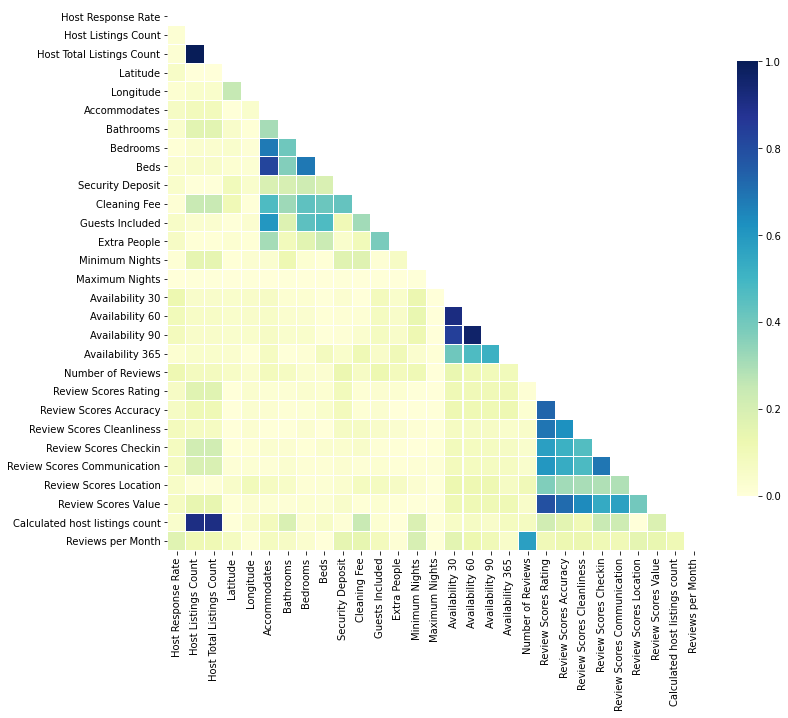

In [ ]:
import seaborn as sns
import pandas.util.testing as tm
import matplotlib.pyplot as plt

#Pintamos la matriz de correlacion para verlo mas claro
# Compute the correlation matrix
corr = np.abs(train.drop(['Price'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

In [ ]:
def top_correlation (df,n):
    corr_matrix = df.corr()
    correlation = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
    correlation = pd.DataFrame(correlation).reset_index()
    correlation.columns=["Variable_1","Variable_2","Correlacion"]
    correlation = correlation.reindex(correlation.Correlacion.abs().sort_values(ascending=False).index).reset_index().drop(["index"],axis=1)
    return correlation.head(n)

top_correlation(train,10)

,Variable_1,Variable_2,Correlacion
0,Host Listings Count,Host Total Listings Count,1.000000
1,Availability 60,Availability 90,0.962288
2,Availability 30,Availability 60,0.916294
3,Host Listings Count,Calculated host listings count,0.909112
4,Host Total Listings Count,Calculated host listings count,0.909112
5,Availability 30,Availability 90,0.843520
6,Accommodates,Beds,0.821857
7,Review Scores Rating,Review Scores Value,0.792022
8,Review Scores Rating,Review Scores Accuracy,0.734338
9,Review Scores Accuracy,Review Scores Value,0.717328


In [ ]:
train = train.drop(['Host Total Listings Count', 'Zipcode'
],axis=1)

In [ ]:
train.head().T

,6360,12195,1546,9327,5697
Price,55,55,35,100,100
Host Since,2017-03-26,2013-10-04,2016-05-17,2016-07-02,2015-06-05
Host Response Time,within a day,NaN,NaN,within a day,within a few hours
Host Response Rate,78,NaN,NaN,90,100
Host Listings Count,1,1,1,1,1
Host Verifications,"email,phone","email,phone,reviews,jumio","email,phone,reviews","email,phone,reviews","email,phone,reviews,jumio,government_id"
Neighbourhood,La Latina,Rios Rosas,Palos de Moguer,Argüelles,Hispanoamérica
Neighbourhood Group Cleansed,Centro,Chamberí,Arganzuela,Moncloa - Aravaca,Chamartín
Latitude,40.4116,40.442,40.406,40.4268,40.4571
Longitude,-3.70906,-3.69965,-3.69238,-3.72825,-3.67738


Comenzamos a rellenar valores Nan en este caso y como comentamos anteriormente, las variables de limpieza y deposito las rellenamos con 0, puesto que entendemos que si estan vacias es porque no cobran dicho servicio.
Sin embargo, la variable objetivo la rellenamos con la media.

In [ ]:
#Rellenamos con ceros
train["Cleaning Fee"].fillna(0 , inplace=True)
train["Security Deposit"].fillna(0 , inplace=True)

In [ ]:
train["Price"].fillna(train["Price"].mean(), inplace=True)

Filtrado de la varia objetivo, utilizando describe y un boxplot, podemos ver que hay muchos outlayers. Eliminamos aquellos precios superiores a 200 (podemos aun eliminar más).

Haciendo esto, sabemos que el modelo podría fallar para valores altos de precios de alquiler, pero lo hacemos a conciencia, ya que queremos que nuestro modelo funcione mejor con precios normales, que al fin y al cabo como podemos ver en el boxplot, son los que mayor presencia tienen en el dataset.

In [ ]:
train['Price'].describe()

count    8595.000000
mean       61.945427
std        53.320553
min         9.000000
25%        30.000000
50%        50.000000
75%        75.000000
max       850.000000
Name: Price, dtype: float64

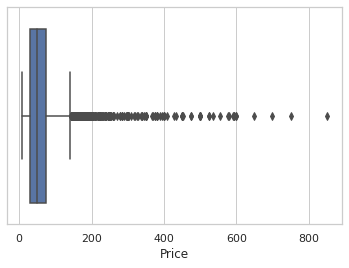

In [ ]:
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.boxplot(x=train["Price"])

In [ ]:
prueba55 = train
train.shape

(8595, 40)

In [ ]:
my_filter2 = prueba55['Price'] < 200
house_data_filtered = prueba55[my_filter2]

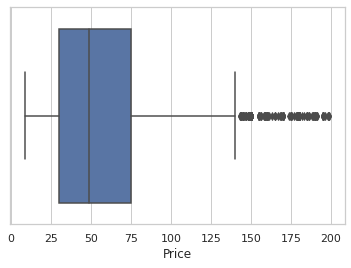

In [ ]:
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.boxplot(x=house_data_filtered["Price"])

In [ ]:
house_data_filtered.head().T

,6360,12195,1546,9327,5697
Price,55,55,35,100,100
Host Since,2017-03-26,2013-10-04,2016-05-17,2016-07-02,2015-06-05
Host Response Time,within a day,NaN,NaN,within a day,within a few hours
Host Response Rate,78,NaN,NaN,90,100
Host Listings Count,1,1,1,1,1
Host Verifications,"email,phone","email,phone,reviews,jumio","email,phone,reviews","email,phone,reviews","email,phone,reviews,jumio,government_id"
Neighbourhood,La Latina,Rios Rosas,Palos de Moguer,Argüelles,Hispanoamérica
Neighbourhood Group Cleansed,Centro,Chamberí,Arganzuela,Moncloa - Aravaca,Chamartín
Latitude,40.4116,40.442,40.406,40.4268,40.4571
Longitude,-3.70906,-3.69965,-3.69238,-3.72825,-3.67738


In [ ]:
#house_data_filtered['Host Verifications']  =str(house_data_filtered['Host Verifications'])
house_data_filtered

,Price,Host Since,Host Response Time,Host Response Rate,Host Listings Count,Host Verifications,Neighbourhood,Neighbourhood Group Cleansed,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Calculated host listings count,Reviews per Month
6360,55.0,2017-03-26,within a day,78.0,1.0,"email,phone",La Latina,Centro,40.411607,-3.709058,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"Wireless Internet,Kitchen,Smoking allowed,Brea...",0.0,0.0,1,0,1,1125,5 days ago,27,57,87,88,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,flexible,1,NaN
12195,55.0,2013-10-04,NaN,NaN,1.0,"email,phone,reviews,jumio",Rios Rosas,Chamberí,40.441982,-3.699652,Apartment,Private room,2,1.0,1.0,2.0,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Wheelch...",0.0,0.0,1,20,3,1125,2 months ago,29,59,89,364,2,80.0,9.0,9.0,10.0,10.0,10.0,9.0,flexible,1,0.08
1546,35.0,2016-05-17,NaN,NaN,1.0,"email,phone,reviews",Palos de Moguer,Arganzuela,40.406010,-3.692376,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"TV,Internet,Wireless Internet,Kitchen,Smoking ...",0.0,0.0,1,0,1,1125,today,0,15,40,40,5,96.0,10.0,10.0,10.0,10.0,9.0,10.0,moderate,1,0.71
9327,100.0,2016-07-02,within a day,90.0,1.0,"email,phone,reviews",Argüelles,Moncloa - Aravaca,40.426837,-3.728246,Apartment,Entire home/apt,5,1.0,3.0,5.0,Real Bed,"TV,Kitchen,Heating,Family/kid friendly,Washer,...",100.0,0.0,1,0,15,1125,today,1,30,60,60,20,76.0,8.0,7.0,9.0,9.0,9.0,8.0,flexible,1,2.61
5697,100.0,2015-06-05,within a few hours,100.0,1.0,"email,phone,reviews,jumio,government_id",Hispanoamérica,Chamartín,40.457101,-3.677383,House,Entire home/apt,6,2.0,3.0,4.0,Real Bed,"TV,Internet,Wireless Internet,Air conditioning...",150.0,40.0,3,9,2,1125,5 days ago,0,0,0,275,51,97.0,10.0,10.0,10.0,10.0,9.0,10.0,moderate,1,2.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6043,25.0,2014-06-03,within a few hours,100.0,1.0,"email,phone,reviews,jumio,government_id",Peñagrande,Fuencarral - El Pardo,40.482173,-3.716390,Apartment,Private room,2,2.0,1.0,4.0,Real Bed,"Internet,Wireless Internet,Kitchen,Heating,Ess...",0.0,0.0,1,0,1,1125,3 weeks ago,21,51,81,356,3,100.0,10.0,9.0,10.0,10.0,10.0,10.0,flexible,1,0.41
4093,39.0,2016-08-06,within a day,100.0,1.0,"phone,reviews",San Diego,Puente de Vallecas,40.395309,-3.667592,Apartment,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,...",0.0,0.0,1,0,2,30,4 days ago,19,43,66,341,12,78.0,9.0,7.0,9.0,9.0,8.0,8.0,flexible,1,1.71
12239,32.0,2014-04-09,within an hour,100.0,1.0,"email,phone,reviews,jumio",Barajas,Barajas,40.455856,-3.584825,Apartment,Private room,2,2.0,1.0,2.0,Real Bed,"Internet,Wireless Internet,Kitchen,Smoking all...",0.0,5.0,1,0,1,1125,5 days ago,5,18,41,51,146,98.0,10.0,10.0,10.0,10.0,10.0,10.0,strict,1,13.90
13440,30.0,2014-11-28,within a few hours,100.0,2.0,"email,phone,reviews,jumio",Adelfas,Retiro,40.398399,-3.671213,Apartment,Private room,2,2.0,1.0,1.0,Real Bed,"TV,Internet,Wireless Internet,Air conditioning...",0.0,0.0,1,10,2,1125,5 days ago,8,20,46,263,27,93.0,10.0,10.0,10.0,10.0,8.0,10.0,moderate,1,0.95


Transformación de la variable Host Verifications, en este caso realizamos un count para ver por cuantas vias puede contactar el cliente con el host, de esta manera comproamos si este trabajo extra del host tiene efectos sobre el precio:

In [ ]:
house_data_filtered['Host Verifications'] = house_data_filtered['Host Verifications'].str.count(',')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
house_data_filtered['Host Verifications'].unique()

array([1, 3, 2, 4, 0, 5, 6, 7, 8, 9])

Transformación de la variable Host Since, calculando la antiguedad en años del host.

In [ ]:
from datetime import datetime

house_data_filtered['Host Since'] = pd.to_datetime(house_data_filtered['Host Since'], format="%Y-%m-%d")
house_data_filtered['Host Since'] = house_data_filtered['Host Since'].apply(lambda x: 2017 - x.year)
house_data_filtered.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Price,Host Since,Host Response Time,Host Response Rate,Host Listings Count,Host Verifications,Neighbourhood,Neighbourhood Group Cleansed,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Calculated host listings count,Reviews per Month
6360,55.0,0.0,within a day,78.0,1.0,1,La Latina,Centro,40.411607,-3.709058,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"Wireless Internet,Kitchen,Smoking allowed,Brea...",0.0,0.0,1,0,1,1125,5 days ago,27,57,87,88,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,flexible,1,NaN
12195,55.0,4.0,NaN,NaN,1.0,3,Rios Rosas,Chamberí,40.441982,-3.699652,Apartment,Private room,2,1.0,1.0,2.0,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Wheelch...",0.0,0.0,1,20,3,1125,2 months ago,29,59,89,364,2,80.0,9.0,9.0,10.0,10.0,10.0,9.0,flexible,1,0.08
1546,35.0,1.0,NaN,NaN,1.0,2,Palos de Moguer,Arganzuela,40.406010,-3.692376,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"TV,Internet,Wireless Internet,Kitchen,Smoking ...",0.0,0.0,1,0,1,1125,today,0,15,40,40,5,96.0,10.0,10.0,10.0,10.0,9.0,10.0,moderate,1,0.71
9327,100.0,1.0,within a day,90.0,1.0,2,Argüelles,Moncloa - Aravaca,40.426837,-3.728246,Apartment,Entire home/apt,5,1.0,3.0,5.0,Real Bed,"TV,Kitchen,Heating,Family/kid friendly,Washer,...",100.0,0.0,1,0,15,1125,today,1,30,60,60,20,76.0,8.0,7.0,9.0,9.0,9.0,8.0,flexible,1,2.61
5697,100.0,2.0,within a few hours,100.0,1.0,4,Hispanoamérica,Chamartín,40.457101,-3.677383,House,Entire home/apt,6,2.0,3.0,4.0,Real Bed,"TV,Internet,Wireless Internet,Air conditioning...",150.0,40.0,3,9,2,1125,5 days ago,0,0,0,275,51,97.0,10.0,10.0,10.0,10.0,9.0,10.0,moderate,1,2.33


Transformación de la variable tiempo de respuesta, consideramos que si el campo esta vacio es porque el host tarda mas de unos cuantos días.

In [ ]:
house_data_filtered['Host Response Time'].value_counts()

within an hour        4950
within a few hours    1559
within a day           791
a few days or more     110
Name: Host Response Time, dtype: int64

In [ ]:
house_data_filtered[house_data_filtered['Host Response Time'].isnull()]

,Price,Host Since,Host Response Time,Host Response Rate,Host Listings Count,Host Verifications,Neighbourhood,Neighbourhood Group Cleansed,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Calculated host listings count,Reviews per Month
12195,55.0,4.0,NaN,NaN,1.0,3,Rios Rosas,Chamberí,40.441982,-3.699652,Apartment,Private room,2,1.0,1.0,2.0,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Wheelch...",0.0,0.0,1,20,3,1125,2 months ago,29,59,89,364,2,80.0,9.0,9.0,10.0,10.0,10.0,9.0,flexible,1,0.08
1546,35.0,1.0,NaN,NaN,1.0,2,Palos de Moguer,Arganzuela,40.406010,-3.692376,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"TV,Internet,Wireless Internet,Kitchen,Smoking ...",0.0,0.0,1,0,1,1125,today,0,15,40,40,5,96.0,10.0,10.0,10.0,10.0,9.0,10.0,moderate,1,0.71
13787,80.0,0.0,NaN,NaN,1.0,0,Goya,Salamanca,40.425439,-3.678507,Apartment,Entire home/apt,4,1.0,2.0,2.0,Real Bed,"TV,Wireless Internet,Kitchen,Smoking allowed,P...",0.0,0.0,1,0,1,7,today,11,41,71,162,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,flexible,1,NaN
9371,22.0,5.0,NaN,NaN,1.0,2,Malasaña,Centro,40.428122,-3.703898,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,"TV,Internet,Wireless Internet,Air conditioning...",0.0,0.0,1,0,20,1125,3 months ago,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,strict,1,NaN
10056,30.0,2.0,NaN,NaN,1.0,1,Argüelles,Moncloa - Aravaca,40.426854,-3.714621,House,Private room,2,1.0,1.0,2.0,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Smoking...",0.0,0.0,1,0,1,1125,22 months ago,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,flexible,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890,36.0,0.0,NaN,NaN,26.0,5,Sol,Centro,40.418770,-3.706361,Apartment,Private room,1,3.0,1.0,1.0,Real Bed,"TV,Wireless Internet,Kitchen,Elevator in build...",200.0,30.0,1,0,7,1125,yesterday,0,6,36,311,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,strict,26,NaN
8346,80.0,2.0,NaN,NaN,1.0,1,Fuente del Berro,Salamanca,40.423267,-3.667500,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"TV,Internet,Wireless Internet,Air conditioning...",0.0,0.0,1,0,1,1125,22 months ago,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,flexible,1,NaN
6033,16.0,5.0,NaN,NaN,1.0,5,Puente de Vallecas,Puente de Vallecas,40.380070,-3.654277,Other,Private room,2,1.5,1.0,1.0,Real Bed,"TV,Internet,Wireless Internet,Air conditioning...",0.0,17.0,1,9,2,6,5 weeks ago,12,36,66,66,23,95.0,10.0,10.0,10.0,10.0,9.0,10.0,strict,1,0.40
2709,20.0,5.0,NaN,NaN,2.0,5,Berruguete,Tetuán,40.457699,-3.704649,House,Private room,1,1.0,1.0,1.0,Real Bed,"TV,Internet,Kitchen,Pets live on this property...",0.0,5.0,1,0,1,1125,3 weeks ago,30,60,90,365,4,95.0,9.0,8.0,9.0,10.0,9.0,9.0,flexible,2,0.22


In [ ]:
house_data_filtered['Host Response Time'].fillna('a few days or more', inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [ ]:
house_data_filtered['Host Response Time'].value_counts()

within an hour        4950
within a few hours    1559
a few days or more    1089
within a day           791
Name: Host Response Time, dtype: int64

Transformación de la variable amenities, en este caso tenemos diferentes servicios o cosas que ofrecen los pisos, consideramos que hay variables que son clave para establecer el precio final. Por ello, realizamos una especie de dummie, y creamos dos nuevas columnas para aquellos pisos que si tienen aire acondicionado y wifi.

In [ ]:
house_data_filtered['Air conditioning'] = np.where(house_data_filtered['Amenities'].str.contains('Air cond', regex=False),1,0)
house_data_filtered['Wireless Internet'] = np.where(house_data_filtered['Amenities'].str.contains('Wireless', regex=False),1,0)
#df4['Air conditioning'] = np.where(df4['Amenities'].str.contains('Air cond', regex=False),1,0)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
house_data_filtered = house_data_filtered.drop(['Amenities'
],axis=1)

Creación de variable distancia_metro:
Descargamos un df con la localizacion de cada parada de metro de madrid y creamos una funcion que compare la distancia de cada piso con todas esas paradas de metro y se quede con a mas cercana. De esta manera tendremos en esa columna la distancia del piso a la parada demetro mas cercana en kms.

In [ ]:
from google.colab import files
uploaded = files.upload()

MessageError: ignored

In [ ]:
import io


metro_df = pd.read_excel(io.BytesIO(uploaded['Metro_2019_12.xlsx']),  index_col=2)

In [ ]:
metro_df.head()

In [ ]:
from math import sin, cos, sqrt, atan2, radians

# approximate radius of earth in km

def distance_metro(long1,lat1,long2,lat2):    
    R = 6373.0
    lat1 = radians(lat1)
    lon1 = radians(long1)
    lat2 = radians(lat2)
    lon2 = radians(long2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c

    return distance

In [ ]:
def comparador(row):
    lat = row['Latitude']
    long = row['Longitude']
    v = list()
    for i in range(len(metro_df)):
        c = distance_metro(metro_df['Longitude'][i+1],metro_df['Latitude'][i+1], long, lat )
        v.append(c)
    return min(v)

In [ ]:
house_data_filtered['distancia_metro'] = house_data_filtered[['Latitude','Longitude']].apply(lambda row: comparador(row), axis=1)

In [ ]:
house_data_filtered.head().T

Tranformacion de variable politica de cancelacion, consideramos que solo hay una estricta, por eso las que sean strict_30 y strict_60 las metemos en el mismo pauqete.

In [ ]:
house_data_filtered['Cancellation Policy'].value_counts()

In [ ]:
#house_data_filtered['Cancellation Policy'].apply(lambda x: 'strict' if x.str.contains('strict'))

house_data_filtered['Cancellation Policy'] = house_data_filtered['Cancellation Policy'].apply(lambda x: 'strict' if 'strict' in x else x)

In [ ]:
house_data_filtered.head().T

In [ ]:
house_data_filtered.dtypes

In [ ]:
house_data_filtered.isnull().any()

Rellenamos con la moda las na de las variables categóricas

In [ ]:
house_data_filtered["Host Response Time"].fillna(house_data_filtered["Host Response Time"].mode()[0], inplace=True)
house_data_filtered["Reviews per Month"].fillna(house_data_filtered["Reviews per Month"].mode()[0], inplace=True)



Rellenamos con la media las variables continuas

In [ ]:
house_data_filtered["Host Since"].fillna(house_data_filtered["Host Since"].mean(), inplace=True)
house_data_filtered["Host Response Rate"].fillna(house_data_filtered["Host Response Rate"].mean(), inplace=True)
house_data_filtered["Host Listings Count"].fillna(house_data_filtered["Host Listings Count"].mean(), inplace=True)
house_data_filtered["Host Verifications"].fillna(house_data_filtered["Host Verifications"].mean(), inplace=True)
house_data_filtered["Bathrooms"].fillna(house_data_filtered["Bathrooms"].mean(), inplace=True)
house_data_filtered["Bedrooms"].fillna(house_data_filtered["Bedrooms"].mean(), inplace=True)
house_data_filtered["Beds"].fillna(house_data_filtered["Beds"].mean(), inplace=True)
house_data_filtered["Review Scores Rating"].fillna(house_data_filtered["Review Scores Rating"].mean(), inplace=True)
house_data_filtered["Review Scores Accuracy"].fillna(house_data_filtered["Review Scores Accuracy"].mean(), inplace=True)
house_data_filtered["Review Scores Cleanliness"].fillna(house_data_filtered["Review Scores Cleanliness"].mean(), inplace=True)
house_data_filtered["Review Scores Checkin"].fillna(house_data_filtered["Review Scores Checkin"].mean(), inplace=True)
house_data_filtered["Review Scores Communication"].fillna(house_data_filtered["Review Scores Communication"].mean(), inplace=True)
house_data_filtered["Review Scores Location"].fillna(house_data_filtered["Review Scores Location"].mean(), inplace=True)
house_data_filtered["Review Scores Value"].fillna(house_data_filtered["Review Scores Value"].mean(), inplace=True)


Añadimos una variable que creo puede ser interesante, numero de camas por habitacion. Si es menor de 1, sabemos que se duereme en sofa.

In [ ]:
house_data_filtered['bed_bedrooms']   = house_data_filtered['Beds']*house_data_filtered['Bedrooms']

In [ ]:
house_data_filtered.isnull().any()

Aplicar MeanEncoder para categorizar

In [ ]:
categorical = ['Host Response Time', 'Neighbourhood', 'Neighbourhood Group Cleansed', 'Property Type', 'Room Type', 'Bed Type', 'Calendar Updated', 'Cancellation Policy']
# En train creamos un dict para usarlo después en test
# ESTO ES EN TRAIN.CSV!

mean_map = {}
for c in categorical:
    mean = house_data_filtered.groupby(c)['Price'].mean()
    
    house_data_filtered[c] = house_data_filtered[c].map(mean)
    
    mean_map[c] = mean
    
# Luego, en test, categorizamos con los datos de train!
# ESTO ES EN TEST.CSV!
#for c in categorical:
 #   df_test[c] = df_test[c].map(mean_map[c])

In [ ]:
house_data_filtered.head().T

Aplicamos todos los cambio hechos a train, al df de test.

In [ ]:
test = test[test['City'].str.contains('drid', na=False)]
test['City'] = test['City'].apply(lambda x: 'Madrid')
test = move_columns(test, ['Price'],0)
test = test.drop(['ID','Listing Url','Scrape ID','Thumbnail Url','Medium Url','Picture Url','XL Picture Url', 'Host ID', 'Host URL', 'Host Name','Host About', 'Host Thumbnail Url', 'Host Picture Url', 'License', 'Jurisdiction Names','Features' ],axis=1)
test = test.drop(['Neighborhood Overview',
 'Notes',
 'Transit',
 'Access',
 'Interaction',
 'House Rules',
 'Host Acceptance Rate',
  'Square Feet',
 'Weekly Price',
 'Monthly Price','Has Availability'
],axis=1)

test = test.drop(['Last Scraped', 'Name', 'Summary', 'Space', 'Description', 'Experiences Offered',
                 'Host Location', 'Host Neighbourhood', 'Street', 'City', 'State', 'Market', 'Smart Location', 'Country Code',
       'Country', 'Calendar last Scraped', 'First Review', 'Last Review','Geolocation'
],axis=1)

test['Neighbourhood'] = np.where(test['Neighbourhood'].isnull(),test['Neighbourhood Cleansed'] , test['Neighbourhood'])
test = test.drop(['Neighbourhood Cleansed'
],axis=1)

test = test.drop(['Host Total Listings Count', 'Zipcode'
],axis=1)

#Rellenamos con ceros. Rellenar con los de train!!!
test["Cleaning Fee"].fillna(0 , inplace=True)
test["Security Deposit"].fillna(0 , inplace=True)
test["Price"].fillna(train["Price"].mean(), inplace=True)

#Quitamos los outlayers
my_filter_test = test['Price'] < 200
test_filter = test[my_filter_test]

test_filter['Host Verifications'] = test_filter['Host Verifications'].str.count(',')

from datetime import datetime

test_filter['Host Since'] = pd.to_datetime(test_filter['Host Since'], format="%Y-%m-%d")
test_filter['Host Since'] = test_filter['Host Since'].apply(lambda x: 2017 - x.year)

test_filter['Host Response Time'].value_counts()
test_filter['Host Response Time'].fillna('a few days or more', inplace=True)

test_filter['Air conditioning'] = np.where(test_filter['Amenities'].str.contains('Air cond', regex=False),1,0)
test_filter['Wireless Internet'] = np.where(test_filter['Amenities'].str.contains('Wireless', regex=False),1,0)
test_filter = test_filter.drop(['Amenities'
],axis=1)

test_filter['distancia_metro'] = test_filter[['Latitude','Longitude']].apply(lambda row: comparador(row), axis=1)

test_filter['Cancellation Policy'] = test_filter['Cancellation Policy'].apply(lambda x: 'strict' if 'strict' in x else x)

#Rellenamos con la moda las na de las variables categóricas. Rellenar con train y poner la variable unknown
test_filter["Host Response Time"].fillna(house_data_filtered["Host Response Time"].mode()[0], inplace=True)
test_filter["Reviews per Month"].fillna(house_data_filtered["Reviews per Month"].mode()[0], inplace=True)

#Rellenamos con la media las variables 
test_filter["Host Since"].fillna(house_data_filtered["Host Since"].mean(), inplace=True)
test_filter["Host Response Rate"].fillna(house_data_filtered["Host Response Rate"].mean(), inplace=True)
test_filter["Host Listings Count"].fillna(house_data_filtered["Host Listings Count"].mean(), inplace=True)
test_filter["Host Verifications"].fillna(house_data_filtered["Host Verifications"].mean(), inplace=True)
test_filter["Bathrooms"].fillna(house_data_filtered["Bathrooms"].mean(), inplace=True)
test_filter["Bedrooms"].fillna(house_data_filtered["Bedrooms"].mean(), inplace=True)
test_filter["Beds"].fillna(house_data_filtered["Beds"].mean(), inplace=True)
test_filter["Review Scores Rating"].fillna(house_data_filtered["Review Scores Rating"].mean(), inplace=True)
test_filter["Review Scores Accuracy"].fillna(house_data_filtered["Review Scores Accuracy"].mean(), inplace=True)
test_filter["Review Scores Cleanliness"].fillna(house_data_filtered["Review Scores Cleanliness"].mean(), inplace=True)
test_filter["Review Scores Checkin"].fillna(house_data_filtered["Review Scores Checkin"].mean(), inplace=True)
test_filter["Review Scores Communication"].fillna(house_data_filtered["Review Scores Communication"].mean(), inplace=True)
test_filter["Review Scores Location"].fillna(house_data_filtered["Review Scores Location"].mean(), inplace=True)
test_filter["Review Scores Value"].fillna(house_data_filtered["Review Scores Value"].mean(), inplace=True)





In [ ]:
test_filter['bed_bedrooms']   = test_filter['Beds']*test_filter['Bedrooms']

Rellenamos las categoricas con los de train, pero comprobamos que hay nulos porque existen valores en test que no hay en train.

In [ ]:
for c in categorical:
    test_filter[c] = test_filter[c].map(mean_map[c])

 


In [ ]:
test_filter.isnull().sum()

Para ello sustituimos dichos valores por la media de las medias en train

In [ ]:
media_de_mediasN = sum(mean_map['Neighbourhood'])/len(mean_map['Neighbourhood'])
media_de_mediasP = sum(mean_map['Property Type'])/len(mean_map['Property Type'])
media_de_mediasC = sum(mean_map['Calendar Updated'])/len(mean_map['Calendar Updated'])


In [ ]:
test_filter['Neighbourhood'].fillna(media_de_mediasN, inplace=True)
test_filter['Property Type'].fillna(media_de_mediasP, inplace=True)
test_filter['Calendar Updated'].fillna(media_de_mediasC, inplace=True)



In [ ]:
test_filter.isnull().sum()

Una vez tenemos el modelado de datos, podemos comenzar a normalizar.

In [ ]:
from sklearn import preprocessing

maxPrice_train = house_data_filtered["Price"].max()
maxPrice_test = test_filter["Price"].max()

house_data_filtered["Price"] = house_data_filtered["Price"] / maxPrice_train
test_filter["Price"] = test_filter["Price"] / maxPrice_test


data = house_data_filtered.values
y_train = data[:,0:1]     # nos quedamos con la 1ª columna, price

X_train = data[:,1:]      # nos quedamos con el resto
feature_names = house_data_filtered.columns[1:]

# Escalamos (con los datos de train)
scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)

In [ ]:
 X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [ ]:
# recordad que esta normalización/escalado la realizo con el scaler anterior, basado en los datos de training!
XtestScaled = scaler.transform(X_val) 

In [ ]:
data_test = test_filter.values
y_test = data_test[:,0:1]     # nos quedamos con la 1ª columna, price
X_test = data_test[:,1:]      # nos quedamos con el resto
feature_names_test = test_filter.columns[1:]

# recordad que esta normalización/escalado la realizo con el scaler anterior, basado en los datos de training!
XtestScaled = scaler.transform(X_test) 

In [ ]:
X_val.shape

#Ejemplo de regresión con Keras y dataset numérico.

In [ ]:
# import the necessary packages
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Activation, Dropout, Dense, Flatten, Input


def create_mlp(dim, regress=False, clasif=False):
	# define our MLP network
	model = Sequential()
	model.add(Dense(64, input_dim=dim, activation="relu"))
	model.add(Dense(32, activation="relu"))
	# check to see if the regression node should be added
	if regress:
		model.add(Dense(1, activation="linear"))
	if clasif:
		model.add(Dense(3, activation='softmax')) 
	# return our model
	return model

In [ ]:
# import the necessary packages
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import numpy as np
import locale
import os



In [ ]:
# create our MLP and then compile the model using mean absolute
# percentage error as our loss, implying that we seek to minimize
# the absolute percentage difference between our price *predictions*
# and the *actual prices*
model = create_mlp(X_train.shape[1], regress=True, clasif=False)
opt = Adam(lr=1e-3, decay=1e-3 / 200)
model.compile(loss='mean_squared_error', optimizer=opt)
# train the model
print("[INFO] training model...")
model.fit(x=X_train, y=y_train, 
	validation_data=(X_val, y_val),
	epochs=200, batch_size=8)

In [ ]:
# make predictions on the testing data
print("[INFO] predicting house prices...")
preds = model.predict(X_test)
# compute the difference between the *predicted* house prices and the
# *actual* house prices, then compute the percentage difference and
# the absolute percentage difference
diff = preds.flatten() - y_test
percentDiff = (diff / y_test) * 100
absPercentDiff = np.abs(percentDiff)
# compute the mean and standard deviation of the absolute percentage
# difference
mean = np.mean(absPercentDiff)
std = np.std(absPercentDiff)

# finally, show some statistics on our model
#locale.setlocale(locale.LC_ALL, "en_US.UTF-8")
#print("[INFO] avg. house price: {}, std house price: {}".format(
#	locale.currency(df["Price"].mean(), grouping=True),
#	locale.currency(df["Price"].std(), grouping=True)))
print("[INFO] mean: {:.2f}%, std: {:.2f}%".format(mean, std))

[INFO] predicting house prices...


# Ejemplo de clasificación con Keras y dataset numérico.

In [ ]:
house_data_cla = house_data_filtered
test_filter_cla =test_filter

In [ ]:
house_data_cla["Price"] = house_data_cla["Price"] * maxPrice_train
test_filter_cla["Price"] = test_filter_cla["Price"] * maxPrice_test

In [ ]:
house_data_cla['Price'].describe()

In [ ]:
def clasi(row):
    if row <= 40:
        return 0
    elif row <=80:
        return 1
    else:
        return 2

In [ ]:
house_data_cla['clas_Price'] = house_data_cla['Price'].apply(lambda row: clasi(row))

In [ ]:
test_filter_cla['clas_Price'] = test_filter_cla['Price'].apply(lambda row: clasi(row))

In [ ]:
house_data_cla = move_columns(house_data_cla, ['clas_Price'],0)
test_filter_cla = move_columns(test_filter_cla, ['clas_Price'],0)

In [ ]:
house_data_cla.head()

In [ ]:
test_filter_cla.head()

In [ ]:
house_data_cla.drop(['Price'], axis=1)


In [ ]:
test_filter_cla.drop(['Price'], axis=1)

In [ ]:
data1 = house_data_cla.values
y_train1 = data1[:,0:1]     # nos quedamos con la 1ª columna, price

X_train1 = data1[:,1:]      # nos quedamos con el resto
feature_names = house_data_cla.columns[1:]

# Escalamos (con los datos de train)
scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)

In [ ]:
 X_train1, X_val1, y_train1, y_val1 = train_test_split(X_train1, y_train1, test_size=0.25, random_state=1)

In [ ]:
XtestScaled = scaler.transform(X_val1) 

ValueError: ignored

In [ ]:
data_test1 = test_filter_cla.values
y_test1 = data_test1[:,0:1]     # nos quedamos con la 1ª columna, price
X_test1 = data_test1[:,1:]      # nos quedamos con el resto
feature_names_test = test_filter_cla.columns[1:]

# recordad que esta normalización/escalado la realizo con el scaler anterior, basado en los datos de training!
XtestScaled = scaler.transform(X_test1) 

ValueError: ignored

In [ ]:
#Como regla general, empezad con Adam. Si no funciona bien, ya os calentaréis la cabeza

model = create_mlp(X_train1.shape[1], regress=False)
opt = Adam(lr=1e-3, decay=1e-3 / 200)
model.compile(loss="categorical_crossentropy", optimizer=opt)
# train the model
print("[INFO] training model...")
model.fit(x=X_train1, y=y_train1, 
	validation_data=(X_val1, y_val1),
	epochs=200, batch_size=8)

[INFO] training model...
Epoch 1/200
965/965 [==============================] - 1s 1ms/step - loss: 176266560.0000 - val_loss: 5497848.0000
Epoch 2/200
965/965 [==============================] - 1s 1ms/step - loss: 17159.3164 - val_loss: 5173939.0000
Epoch 3/200
965/965 [==============================] - 1s 1ms/step - loss: 50389.4219 - val_loss: 4725608.5000
Epoch 4/200
965/965 [==============================] - 1s 1ms/step - loss: 47630.0469 - val_loss: 4829126.5000
Epoch 5/200
965/965 [==============================] - 1s 1ms/step - loss: 62.3465 - val_loss: 4829126.5000
Epoch 6/200
965/965 [==============================] - 1s 1ms/step - loss: 62.3465 - val_loss: 4829126.5000
Epoch 7/200
965/965 [==============================] - 1s 2ms/step - loss: 62.3465 - val_loss: 4829126.5000
Epoch 8/200
965/965 [==============================] - 1s 1ms/step - loss: 62.3465 - val_loss: 4829126.0000
Epoch 9/200
965/965 [==============================] - 1s 1ms/step - loss: 62.3465 - val_loss: 

In [ ]:
# make predictions on the testing data
print("[INFO] predicting house prices...")
preds = model.predict(X_test)
# compute the difference between the *predicted* house prices and the
# *actual* house prices, then compute the percentage difference and
# the absolute percentage difference
diff = preds.flatten() - y_test
percentDiff = (diff / y_test) * 100
absPercentDiff = np.abs(percentDiff)
# compute the mean and standard deviation of the absolute percentage
# difference
mean = np.mean(absPercentDiff)
std = np.std(absPercentDiff)

# finally, show some statistics on our model
#locale.setlocale(locale.LC_ALL, "en_US.UTF-8")
#print("[INFO] avg. house price: {}, std house price: {}".format(
#	locale.currency(df["Price"].mean(), grouping=True),
#	locale.currency(df["Price"].std(), grouping=True)))
print("[INFO] mean: {:.2f}%, std: {:.2f}%".format(mean, std))

# Regresion con imágenes

In [ ]:
# Build the VGG16 network with ImageNet weights
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np

model_base = VGG16(weights='imagenet', include_top=False)

x = model_base.output
gap = GlobalAveragePooling2D()(x)
model = Model(inputs=model_base.input, outputs=gap)

model.summary()

In [ ]:
loaded_images.shape

In [ ]:
len(images_paths)

In [ ]:
from tqdm import tqdm  # para  mostrar el progreso
# vamos a procesarlas y a extraer el vector de 512 características
images_feat = np.zeros((len(images_paths), 512))

for i in tqdm(range(loaded_images.shape[0])):
    img = loaded_images[i]
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    features = model.predict(x)
    images_feat[i] = features[0]

In [ ]:
#Buenas Felix,

#Se que la práctica esta incompleta pero es que me hice bastante lio con el tema de las caracteristicas y unir el dataset normal con el de imagenes por eso no pude seguir.
#Me da pena porque simplemente me quedaba implemetar modelos e intentar hacer alguna regularizacion para mejorarlo, pero me hice un lio. No se si sera suficiente para un apto, pero lo he intentado.
#Muchas gracias por tu atencion.